In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worker-strikes-and-protests-in-china/strike_data.csv


In [2]:
strike_data = '../input/worker-strikes-and-protests-in-china/strike_data.csv'

In [3]:
protest_data = pd.read_csv(strike_data)
protest_data.head()

,Date,Description,Province,City,Industry,Sub Industry,Company Name,Company Ownership,Action Type,Number Of Participants,Employees Demands,Response to Collective Actions
0,2021-08-30,"Workers protest against wage arrears in Xian, ...",陕西省,西安市,Construction,Commercial Property,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Negotiations with Management
1,2021-08-29,Workers protest against wage arrears of a cons...,黑龙江省,绥化市,Construction,NaN,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Government Intervention/Negotiations with Mana...
2,2021-08-28,Taxi drivers protest against shared electric b...,山西省,临汾市,Transport&Logistics,Taxi,NaN,Private Enterprise,Strike/Protest,101-1000,Management Supervision/Other,NaN
3,2021-08-28,Workers protest against wage arrears of a cons...,陕西省,渭南市,Construction,Commercial Property,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Government Intervention
4,2021-08-27,Workers protest against wage arrears of a cons...,广东省,湛江市,Construction,Residential Property,NaN,SOE,Protest,1-100,Wage Arrears,NaN


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
protest_data.describe() # no info of company in which protests occured

,Company Name
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [6]:
protest_data.info()  #as we also saw above there is no value in company name column. There is some null values in column Sub industry, Action-type, Employee Demands And Response
                        #to Collective Actions'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            469 non-null    object 
 1   Description                     469 non-null    object 
 2   Province                        469 non-null    object 
 3   City                            466 non-null    object 
 4   Industry                        469 non-null    object 
 5   Sub Industry                    363 non-null    object 
 6   Company Name                    0 non-null      float64
 7   Company Ownership               469 non-null    object 
 8   Action Type                     468 non-null    object 
 9   Number Of Participants          469 non-null    object 
 10  Employees Demands               458 non-null    object 
 11  Response to Collective Actions  293 non-null    object 
dtypes: float64(1), object(11)
memory usa

In [7]:
#protest_data['Response to Collective Actions'].unique()

In [8]:
#For company name we can assume that source has no info about company or it is kept secret., Similar is the case with Sub Industry
#For Action Type, for one incident, we don't have the strike type.
#For Employee demands, for some protests we don't have the demand of the protest
#For Response to Collective Actions, for some protests we don't have info about steps taken by administration to deal with protestors.

In [9]:
protest_data.dtypes

Date                               object
Description                        object
Province                           object
City                               object
Industry                           object
Sub Industry                       object
Company Name                      float64
Company Ownership                  object
Action Type                        object
Number Of Participants             object
Employees Demands                  object
Response to Collective Actions     object
dtype: object

Creating a column Average number of participants

In [10]:
def avgParticipants(participants):         #input = '1-100'
    part_list_str = participants.split('-')   #eg = ['1','100']
    part_list_int  = [int(str_nos) for str_nos in part_list_str]  # int - > [1,100]
    return sum(part_list_int)/len(part_list_int)

In [11]:
protest_data['Estimate Number Of Participants']  = protest_data['Number Of Participants'].apply(avgParticipants)

In [12]:
protest_data.head()

,Date,Description,Province,City,Industry,Sub Industry,Company Name,Company Ownership,Action Type,Number Of Participants,Employees Demands,Response to Collective Actions,Estimate Number Of Participants
0,2021-08-30,"Workers protest against wage arrears in Xian, ...",陕西省,西安市,Construction,Commercial Property,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Negotiations with Management,50.5
1,2021-08-29,Workers protest against wage arrears of a cons...,黑龙江省,绥化市,Construction,NaN,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Government Intervention/Negotiations with Mana...,50.5
2,2021-08-28,Taxi drivers protest against shared electric b...,山西省,临汾市,Transport&Logistics,Taxi,NaN,Private Enterprise,Strike/Protest,101-1000,Management Supervision/Other,NaN,550.5
3,2021-08-28,Workers protest against wage arrears of a cons...,陕西省,渭南市,Construction,Commercial Property,NaN,Private Enterprise,Protest,1-100,Wage Arrears,Government Intervention,50.5
4,2021-08-27,Workers protest against wage arrears of a cons...,广东省,湛江市,Construction,Residential Property,NaN,SOE,Protest,1-100,Wage Arrears,NaN,50.5


In [13]:
#protest_data.drop('Average Number Of Participants',inplace=True,axis = 1)

<AxesSubplot:title={'center':'Total no of participants in a protest in each Industry(Avg of an occ date)'}, xlabel='Industry', ylabel='Estimate Number Of Participants'>

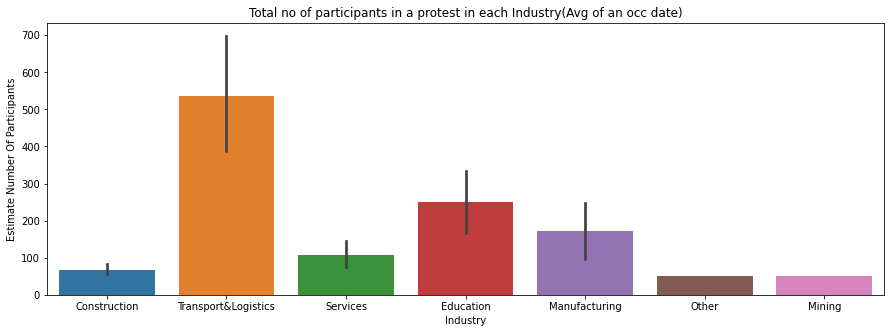

In [14]:
plt.figure(figsize = (15,5))

plt.title('Total no of participants in a protest in each Industry(Avg of an occ date)')

sns.barplot(data = protest_data, x = 'Industry', y = 'Estimate Number Of Participants')

**Transport&Logistics has maximum no of protestors**

<AxesSubplot:xlabel='Industry', ylabel='count'>

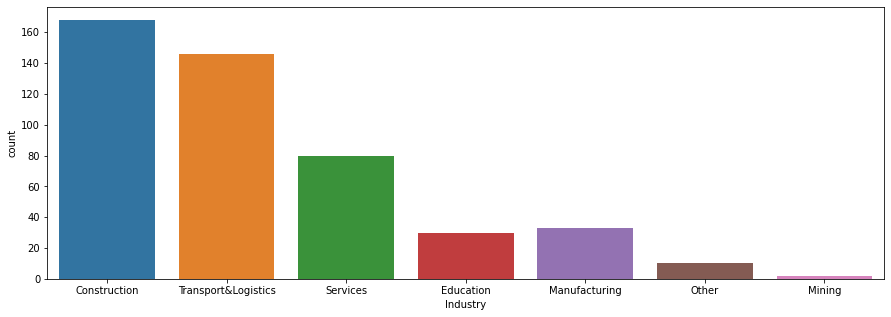

In [15]:
plt.figure(figsize = (15,5))

sns.countplot(data = protest_data, x = 'Industry')

**Maximum protests happened in constructor industry**

<AxesSubplot:xlabel='Company Ownership', ylabel='count'>

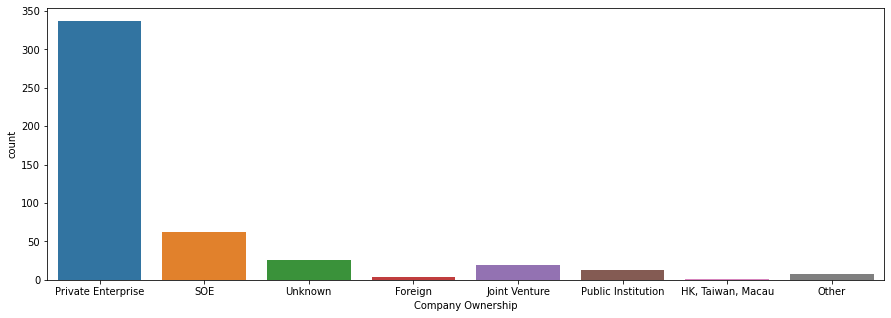

In [16]:
plt.figure(figsize = (15,5))

sns.countplot(data = protest_data, x = 'Company Ownership')

**Maxiumum Protests occured in Private Enterprises**

<AxesSubplot:xlabel='Action Type', ylabel='count'>

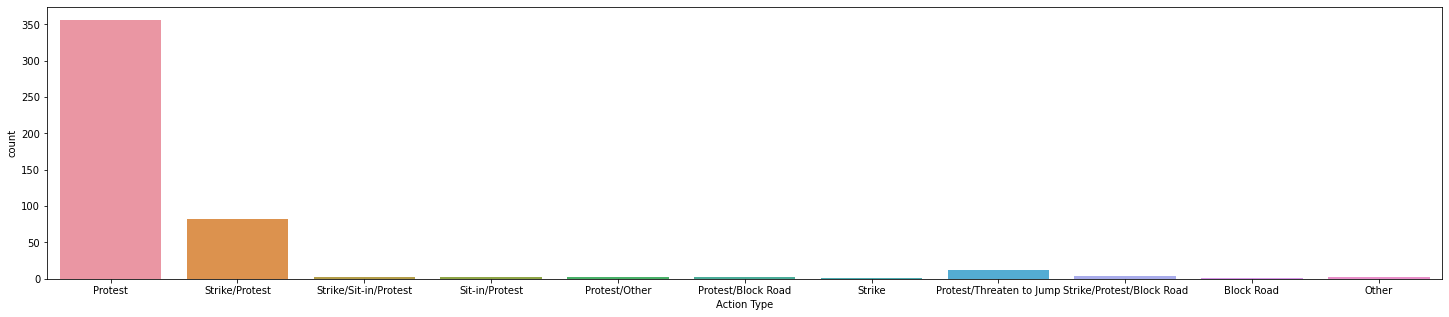

In [17]:
plt.figure(figsize = (25,5))

sns.countplot(data = protest_data, x = 'Action Type')

**Most of protests are termed as just Protest**

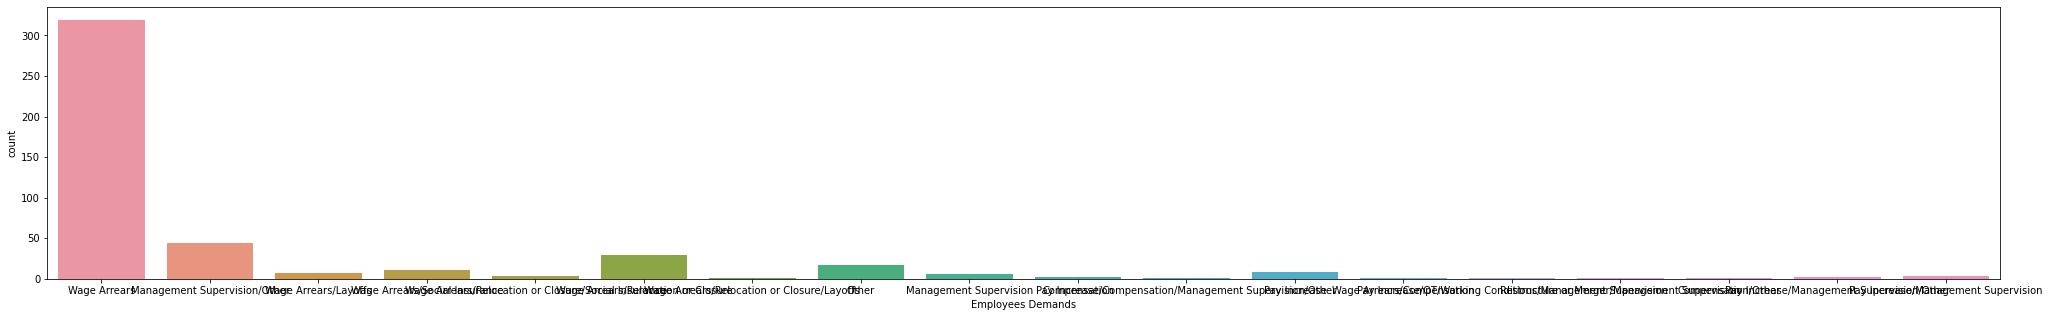

In [18]:
plt.figure(figsize = (35,5))

sns.countplot(data = protest_data, x = 'Employees Demands')

plt.savefig('/kaggle/working/EmployeeDemands.jpeg')

**Most protests happened to demand of payment of overdue wage arrears.**

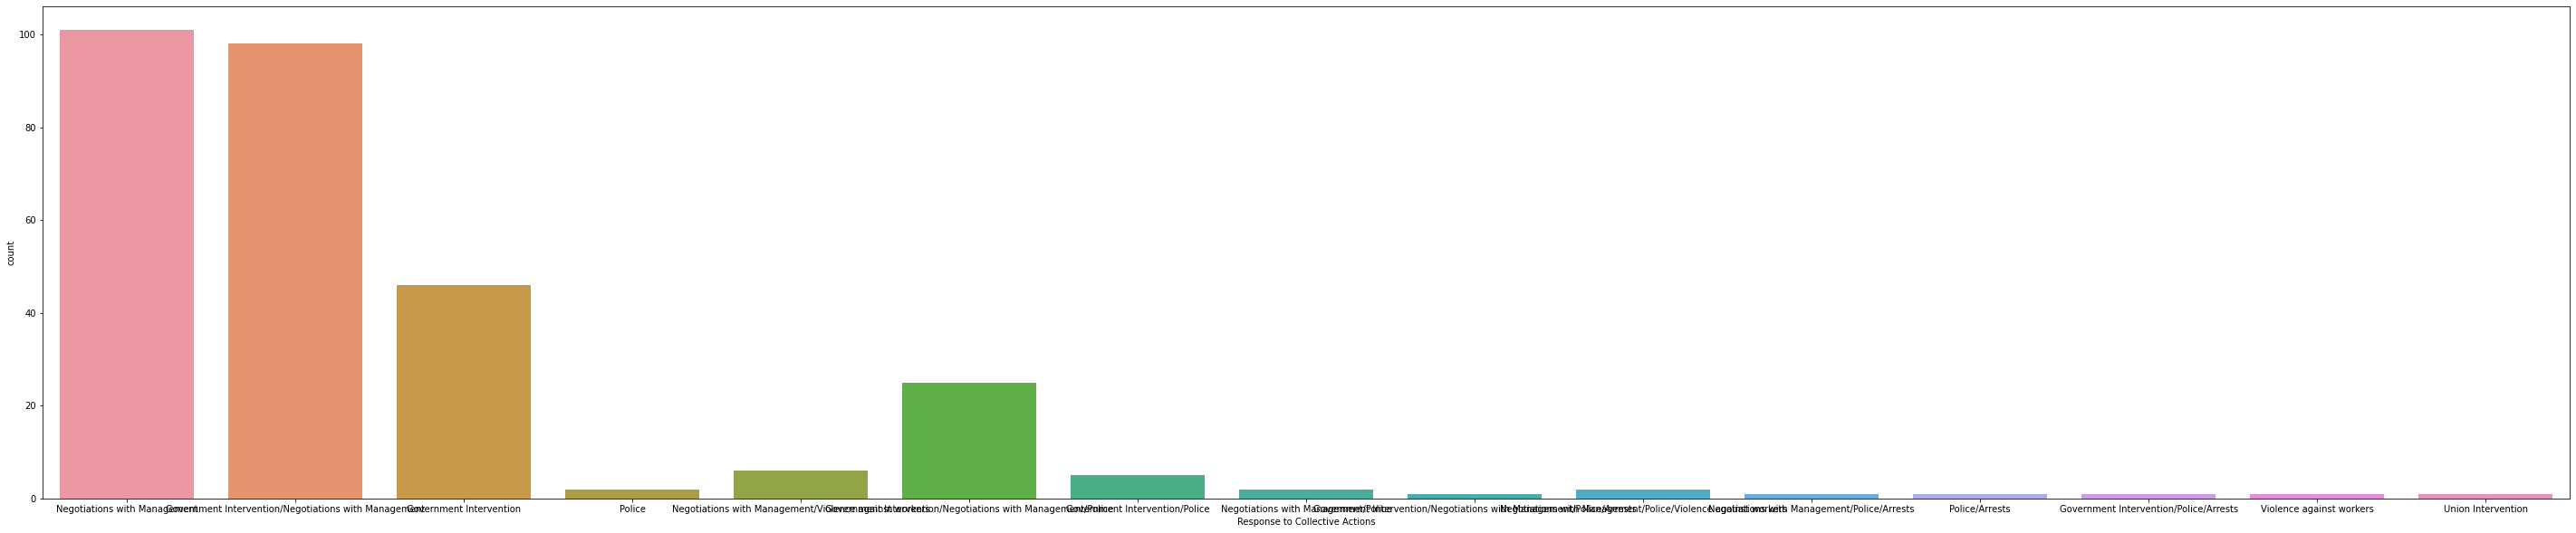

In [19]:
plt.figure(figsize = (50,10))

sns.countplot(data = protest_data, x = 'Response to Collective Actions')

plt.savefig('/kaggle/working/ResponseToProtests.jpeg')

Almost all protests ended with Negotiations with Management or government.

In [20]:
protest_data.Description

0      Workers protest against wage arrears in Xian, ...
1      Workers protest against wage arrears of a cons...
2      Taxi drivers protest against shared electric b...
3      Workers protest against wage arrears of a cons...
4      Workers protest against wage arrears of a cons...
                             ...                        
464    Workers protest against wage arrears of a cons...
465    Workers protest against wage arrears of a cons...
466    Meituan food delivery workers protest against ...
467    Meituan food delivery workers go on strike to ...
468    Taxi drivers protest against illegal cabs near...
Name: Description, Length: 469, dtype: object

In [21]:
with open('Protest_description.txt','w') as wob:     #saved the description in a txt file
    for description in protest_data.Description:
        wob.write(description + '\n')

In [22]:
#def translate_to_eng(chinese_text):
    #return translator.translate(chinese_text).text

In [23]:
#protest_data['Province'] = protest_data['Province'].apply(translate_to_eng)

In [24]:
#protest_data.dtypes

In [25]:
#protest_data['City'] = protest_data['City'].astype('str')

In [26]:
#protest_data['City'] = protest_data['City'].apply(translate_to_eng)

In [27]:
#protest_data.head()